Mean Absolute Error: 1214117.2103640616
Intercept: 272319.1745725614
Coefficient: 222.13484925415307


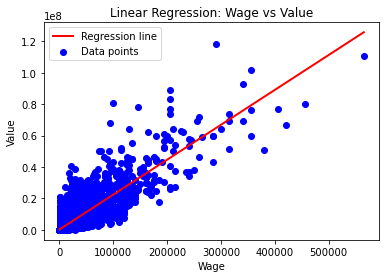

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import re

# Load the dataset
data_frame = pd.read_csv('/Users/martarachwani/Desktop/data.csv')

# Preprocess the 'Wage' and 'Value' columns
def preprocess_currency(value):
    if isinstance(value, str):
        # Remove the currency symbol and convert K to thousands, M to millions
        value = re.sub(r'[€,]', '', value)
        if 'K' in value:
            value = float(value.replace('K', '')) * 1000
        elif 'M' in value:
            value = float(value.replace('M', '')) * 1000000
        else:
            value = float(value)
    return value

data_frame['Wage'] = data_frame['Wage'].apply(preprocess_currency)
data_frame['Value'] = data_frame['Value'].apply(preprocess_currency)

# Prepare the data
X = data_frame[['Wage']]  # Feature (independent variable)
y = data_frame['Value']   # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Displaying the regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Visualize the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Linear Regression: Wage vs Value')
plt.legend()
plt.show()


